# Apple Stocks Analysis (using R)
---
### Similar project to the Python equivalent.

In [1]:
suppressMessages(require(dplyr))
suppressMessages(require(ggplot2))
suppressMessages(require(gridExtra))
suppressMessages(require(scales))
suppressMessages(require(grid))

options(warn=-1)

# Read in the stockdata
stock <- read.csv("/Users/HarleyMAC/Documents/GitHub/personal-projects/Apple Stock (R)/aapl.csv")

## Functions

In [2]:
eleven_days <- function(d) 
{
    
    #     This function creates a factor with the given date, the five dates before,
    #     and the five dates after. This is because there are sometimes missing 
    #     trading days when trying to produce a launch week. This comes in handy in 
    #     the launch_week function.
    #     Accepts a date as a character.
    
    c <- as.Date(d, tz = "EST")
    days <- c(d1 <- c-5, d2 <- c-4, d3 <- c-3, d4 <- c-2, 
              d5 <- c-1, d6 <- c, d7 <- c+1, d8 <- c+2, 
              d9 <- c+3, d10 <- c+4, d11 <- c+5)
    days
}

launch_close <- function(d)
{
    #     Take a given date, check the stock data, and return the closing price for
    #     that date. 
    #     Accepts a date as a character.

    condition <- stock %>%
        filter(Date == as.character(d))
    condition[,5] #Column 5 = Closing Price
}

launch_week <- function(d)
{
    days <- eleven_days(d)
    #Week days as characters so they can be passed to launch_close
    week <- as.character(days)
    #sapply launch_close to each week day
    cprice <- sapply(week,launch_close)
    cweek <- as.double(cprice)
    cweek <- data.frame(days, cweek)
    colnames(cweek) <- c("date","close")
    na.omit(cweek) #return without missing dates
}

launch_stats <- function(ip,lw_ip)
{
    min <- min(lw_ip["close"])
    max <- max(lw_ip["close"])
    diff <- max-min
    cat("Launch week stats for: ", ip, "\n")
    cat("Min Price: ", min, " ")
    cat("Max Price: ", max, " ")
    cat("Change over Week: ", diff, "\n\n")
}

## Initialize Variables

In [3]:
ip6 <- 'iPhone 6'
ip6s <- 'iPhone 6s'
ip7 <- 'iPhone 7'
ip8 <- 'iPhone 8'
ipX <- 'iPhone X'
ipXs <- 'iPhone Xs'

ip_6 <- '2014-09-09'
ip_6s <- '2015-09-09'
ip_7 <- '2016-09-07'
ip_8 <- '2017-09-12'
ip_X <- '2017-09-12'
ip_Xs <- '2018-09-12'

lw_ip6 <- launch_week(ip_6)
lw_ip6s <- launch_week(ip_6s)
lw_ip7 <- launch_week(ip_7)
lw_ip8 <- launch_week(ip_8)
lw_ipX <- launch_week(ip_X)
lw_ipXs <- launch_week(ip_Xs)

## Statistics

In [4]:
launch_stats(ip6, lw_ip6)
launch_stats(ip6s, lw_ip6s)
launch_stats(ip7, lw_ip7)
launch_stats(ip8, lw_ip8)
launch_stats(ipX, lw_ipX)
launch_stats(ipXs, lw_ipXs)

Launch week stats for:  iPhone 6 
Min Price:  97.99  Max Price:  101.66  Change over Week:  3.670006 

Launch week stats for:  iPhone 6s 
Min Price:  109.27  Max Price:  115.31  Change over Week:  6.040001 

Launch week stats for:  iPhone 7 
Min Price:  103.13  Max Price:  108.36  Change over Week:  5.230004 

Launch week stats for:  iPhone 8 
Min Price:  158.28  Max Price:  161.5  Change over Week:  3.220001 

Launch week stats for:  iPhone X 
Min Price:  158.28  Max Price:  161.5  Change over Week:  3.220001 

Launch week stats for:  iPhone Xs 
Min Price:  217.88  Max Price:  226.41  Change over Week:  8.529999 



## Plots

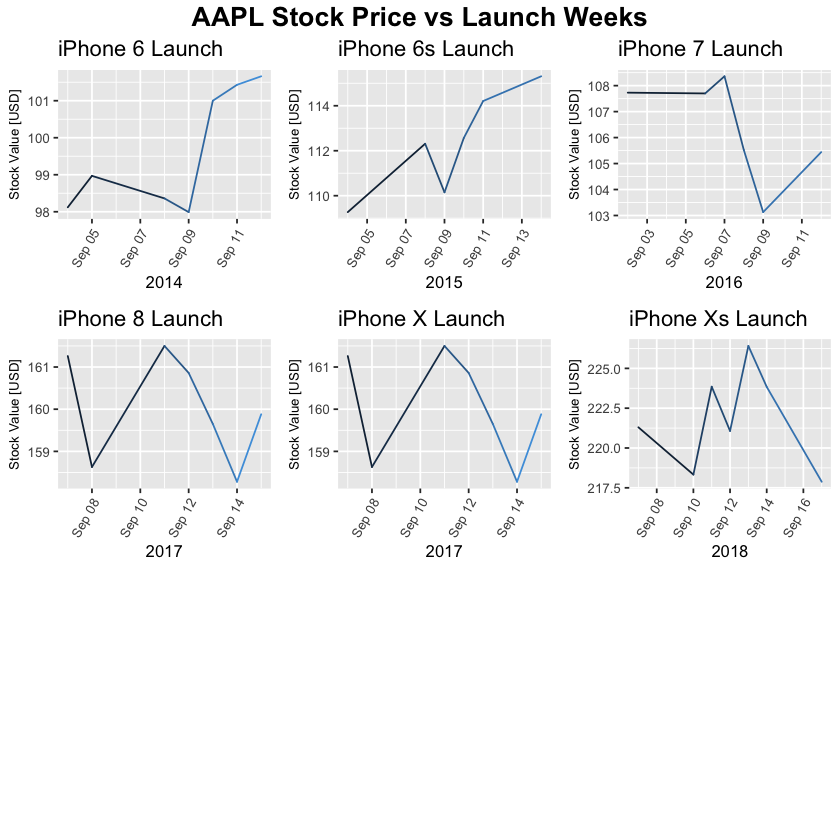

In [5]:
x <- seq(0.01, .99, length.out = 100)
my_theme <- theme(axis.text.x=element_text(size=8, angle=60, hjust=1),
        axis.text.y=element_text(size=8),
        axis.title.x=element_text(size=10),
        axis.title.y=element_text(size=8),
        legend.position="none")

p_ip6 <- ggplot(lw_ip6, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2014",y="Stock Value [USD]",title="iPhone 6 Launch") + 
    my_theme
p_ip6s <- ggplot(lw_ip6s, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2015",y="Stock Value [USD]",title="iPhone 6s Launch") + 
    my_theme
p_ip7 <- ggplot(lw_ip7, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2016",y="Stock Value [USD]",title="iPhone 7 Launch") + 
    my_theme
p_ip8 <- ggplot(lw_ip8, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2017",y="Stock Value [USD]",title="iPhone 8 Launch") + 
    my_theme
p_ipX <- ggplot(lw_ipX, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2017",y="Stock Value [USD]",title="iPhone X Launch") + 
    my_theme
p_ipXs <- ggplot(lw_ipXs, aes(x=date, y=close, color=date)) + geom_line(lineend="round") +
    labs(x="2018",y="Stock Value [USD]",title="iPhone Xs Launch") + 
    my_theme

grid.arrange(p_ip6,p_ip6s,p_ip7,p_ip8,p_ipX,p_ipXs, nrow = 3, ncol = 3, 
             top=textGrob("AAPL Stock Price vs Launch Weeks", gp=gpar(fontface=2,fontsize=16)))